In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def Click(event, x, y, flags, params):
    #function for getting co-ordinates by mouse click
    if event == cv.EVENT_LBUTTONDOWN:
        print(x, ' ', y)

def SuperImpose(im_src, im_dst, src_pts, dst_pts):
    #function to superimpose
    h, status = cv.findHomography(src_pts, dst_pts)
    im_out = cv.warpPerspective(im_src, h, (im_dst.shape[1], im_dst.shape[0]))
    return cv.addWeighted(im_out, 0.3, im_dst, 0.7, 0.0)

(128, 255, 3)
(185, 272, 3)


(-0.5, 1023.5, 767.5, -0.5)

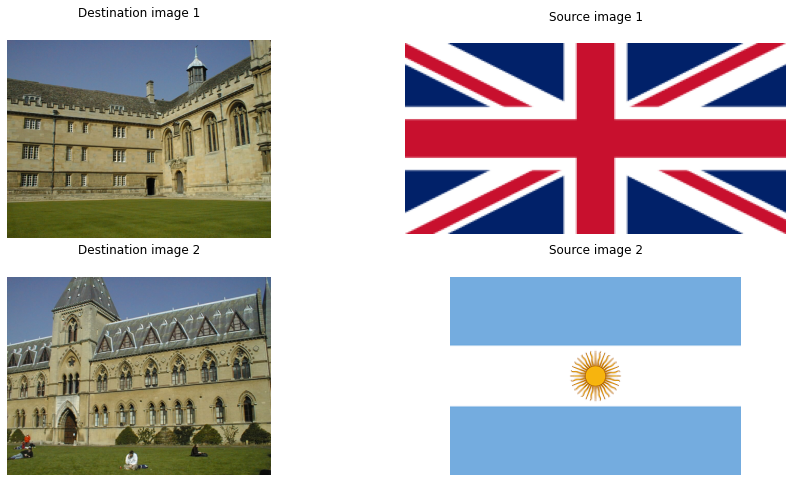

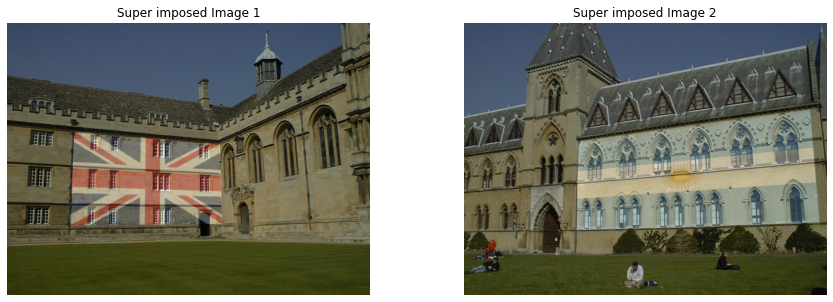

In [6]:
dst1 = cv.imread(r'wadham_college\003.jpg',cv.IMREAD_COLOR)
assert dst1 is not None

src1 = cv.imread(r'Flag_of_the_United_Kingdom.png',cv.IMREAD_ANYCOLOR)
assert src1 is not None

dst2 = cv.imread(r'University_Library\001.jpg',cv.IMREAD_COLOR)
assert dst2 is not None

src2 = cv.imread(r'Flag_of_Argentina.png',cv.IMREAD_ANYCOLOR)
assert src2 is not None

fig, ax = plt.subplots(2, 2, figsize=(15, 8))
ax[0, 0].imshow(cv.cvtColor(dst1, cv.COLOR_BGR2RGB))
ax[0, 0].set_title('Destination image 1')
ax[0, 0].axis('off')
ax[0, 0].xaxis.tick_top()

ax[0, 1].imshow(cv.cvtColor(src1, cv.COLOR_BGR2RGB))
ax[0, 1].set_title('Source image 1')
ax[0, 1].axis('off')
ax[0, 1].xaxis.tick_top()

ax[1, 0].imshow(cv.cvtColor(dst2, cv.COLOR_BGR2RGB))
ax[1, 0].set_title('Destination image 2')
ax[1, 0].axis('off')
ax[1, 0].xaxis.tick_top()

ax[1, 1].imshow(cv.cvtColor(src2, cv.COLOR_BGR2RGB))
ax[1, 1].set_title('Source image 2')
ax[1, 1].axis('off')
ax[1, 1].xaxis.tick_top()

cv.imshow('image', dst1)
cv.setMouseCallback('image', Click)
cv.waitKey(0)
cv.destroyAllWindows()

cv.imshow('image', dst2)
cv.setMouseCallback('image', Click)
cv.waitKey(0)
cv.destroyAllWindows()

dst_pts1 = np.array([[190, 307], [600, 342], [606, 566], [178, 570]])
dst_pts2 = np.array([[321, 335], [974, 245],  [1001, 562], [318, 584]])

print(src1.shape)
print(src2.shape)

src_pts1 = np.array([[0, 0], [254, 0], [254, 127], [0, 127]])
src_pts2 = np.array([[0, 0], [271, 0], [271, 184], [0, 184]])

result1 = SuperImpose(src1, dst1, src_pts1, dst_pts1)
result2 = SuperImpose(src2, dst2, src_pts2, dst_pts2)

fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].imshow(cv.cvtColor(result1, cv.COLOR_BGR2RGB))
ax[0].set_title('Super imposed Image 1')
ax[0].axis('off')

ax[1].imshow(cv.cvtColor(result2, cv.COLOR_BGR2RGB))
ax[1].set_title('Super imposed Image 2')
ax[1].axis('off')
